<a href="https://colab.research.google.com/github/mokshithlolakpuri/Nbad-final-project/blob/master/Boston_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Exercise on Data Exploration and Preparation Summer 2025 ITCS 6162
## Your Name: Mokshith Varma Lolakapuri

### Using the Boston Building and Property Violations Dataset showing a variety of code violations, perform exploratory data analysis, data wrangling and document what you learn. Execute the code sequentially starting with library imports and continue wherever code is already entered. Follow instructions and add code or text where indicated (Question 1, Question 2, etc.). Feel free to add other code. Turn in your notebook "printed" as a PDF but be sure to Download the .ipynb version as well for continuing work or for saving when complete.
### To learn more about the metadata visit: <a href="https://data.boston.gov/dataset/building-and-property-violations1/resource/800a2663-1d6a-46e7-9356-bedb70f5332c">Boston Building and Property Violations</a><br>


### Review the notebook at <a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=ahx_HYUqYc9T">Python Data Science Handbook Visualization With Seaborn</a> to assist with the visualizations. You can also use AI to assist with the code, but make sure you understand every line of code!

In [22]:
# 📦 Step 1: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Visual settings
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")

In [28]:
# 🗂️ Step 2: Load Dataset from Course GitHub
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.head()

df = pd.read_csv(url)


In [29]:
# 🔍 Step 3: Basic Data Overview
print("Dataset shape:", df.shape)
df.info()
df.describe(include='all')

Dataset shape: (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [30]:
# 🧽 Step 4: Data Cleaning & Preprocessing
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Parse dates
if 'violation_date' in df.columns:
    df['violation_date'] = pd.to_datetime(df['violation_date'], errors='coerce')

# Check missing
df.isnull().sum()


,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


## Question 1 Part A: using code, document the nulls in the dataset.

In [ ]:
#Question 1 Part A using code, show the nulls in the dataframe

## Question 1 Part B: How would you handle the nulls? In the markdown cell below, document several ways to handle the nulls in the dataset. You are not required to enter code (optional), only describe approaches to handling the nulls.

## Question 1 Part B Answer:


In [31]:
#lets add a column - month - and make it numeric
# we will use slice
bostondata['month'] = bostondata['status_dttm'].str.slice(5,7)
#one of the values is not null, but has spaces
bostondata["month"].replace({"": "09"}, inplace=True)
# change the column type from object to int
bostondata['month'] = pd.to_numeric(bostondata['month'])
#lets see info on bostondata
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16782 entries, 0 to 16781
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           16782 non-null  object 
 1   ap_case_defn_key  16782 non-null  int64  
 2   status_dttm       16781 non-null  object 
 3   status            16782 non-null  object 
 4   code              16782 non-null  object 
 5   value             0 non-null      float64
 6   description       16535 non-null  object 
 7   violation_stno    16782 non-null  object 
 8   violation_sthigh  4248 non-null   object 
 9   violation_street  16782 non-null  object 
 10  violation_suffix  16638 non-null  object 
 11  violation_city    16782 non-null  object 
 12  violation_state   16782 non-null  object 
 13  violation_zip     16780 non-null  object 
 14  ward              16782 non-null  object 
 15  contact_addr1     16777 non-null  object 
 16  contact_addr2     3017 non-null   object

/tmp/ipython-input-31-254802313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bostondata["month"].replace({"": "09"}, inplace=True)


## Question 2: Get the value counts (number of occurrences of unique values) for the records by our new month column

In [33]:
# Question 2 code: lets get the value counts for our new column
bostondata['month'].value_counts()


,count
month,
3.0,1721
9.0,1649
5.0,1594
6.0,1504
4.0,1501
7.0,1421
2.0,1404
10.0,1358
8.0,1283


## Question 3. Using the describe function, get statistical information on the numerical features (columns).

In [34]:
#Question 3 code: statistical information
bostondata.describe()


,ap_case_defn_key,value,sam_id,latitude,longitude,month
count,16782.0,0.0,16690.000000,16689.000000,16689.000000,16781.000000
mean,1013.0,NaN,98647.667645,42.260501,-71.101029,6.297956
std,0.0,NaN,74503.376587,0.719364,0.231153,3.300704
min,1013.0,NaN,0.000000,34.244387,-73.651391,1.000000
25%,1013.0,NaN,48360.250000,42.295670,-71.099841,3.000000
50%,1013.0,NaN,92897.000000,42.325629,-71.075021,6.000000
75%,1013.0,NaN,132511.750000,42.353488,-71.058570,9.000000
max,1013.0,NaN,460046.000000,42.392699,-70.995970,12.000000


## Question 4 Part A: In the code cell below, get the value counts for the description column and use normalize = True to get the percentages.

In [36]:
#Question 4 Part A Code: Value Counts
bostondata['description'].value_counts(normalize=True) * 100



,proportion
description,
Failure to Obtain Permit,24.566072
Unsafe and Dangerous,21.917145
Maintenance,9.803447
Testing & Certification,5.406713
Unsafe Structures,4.221349
...,...
Grounding electrode conduction,0.006048
Removal/Making Structure Safe,0.006048
Use & Occupancy,0.006048


## Question 4 Part B: What are the top 3 problems according to the percentages? Answer using the markdown cell below.

## Question 4 Part B Answer:{{q4_top3}}




## Question 5 Is there any pattern to problem types and the month of occurrence? Create a visualization to learn more in the code cell below.
#Answer
#Make a visualization that indicates how often each type of problem recurs in various months. Use a bar plot, countplot, or heatmap from Seaborn to look at monthly or seasonal trends for various types of violations.

# Tip: Utilize sns.countplot() or pd.crosstab() paired with a heatmap to group on month and description.

# Objective: Determine if some types of violations recur more frequently in particular months and graph the connection.

/tmp/ipython-input-38-1991380877.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


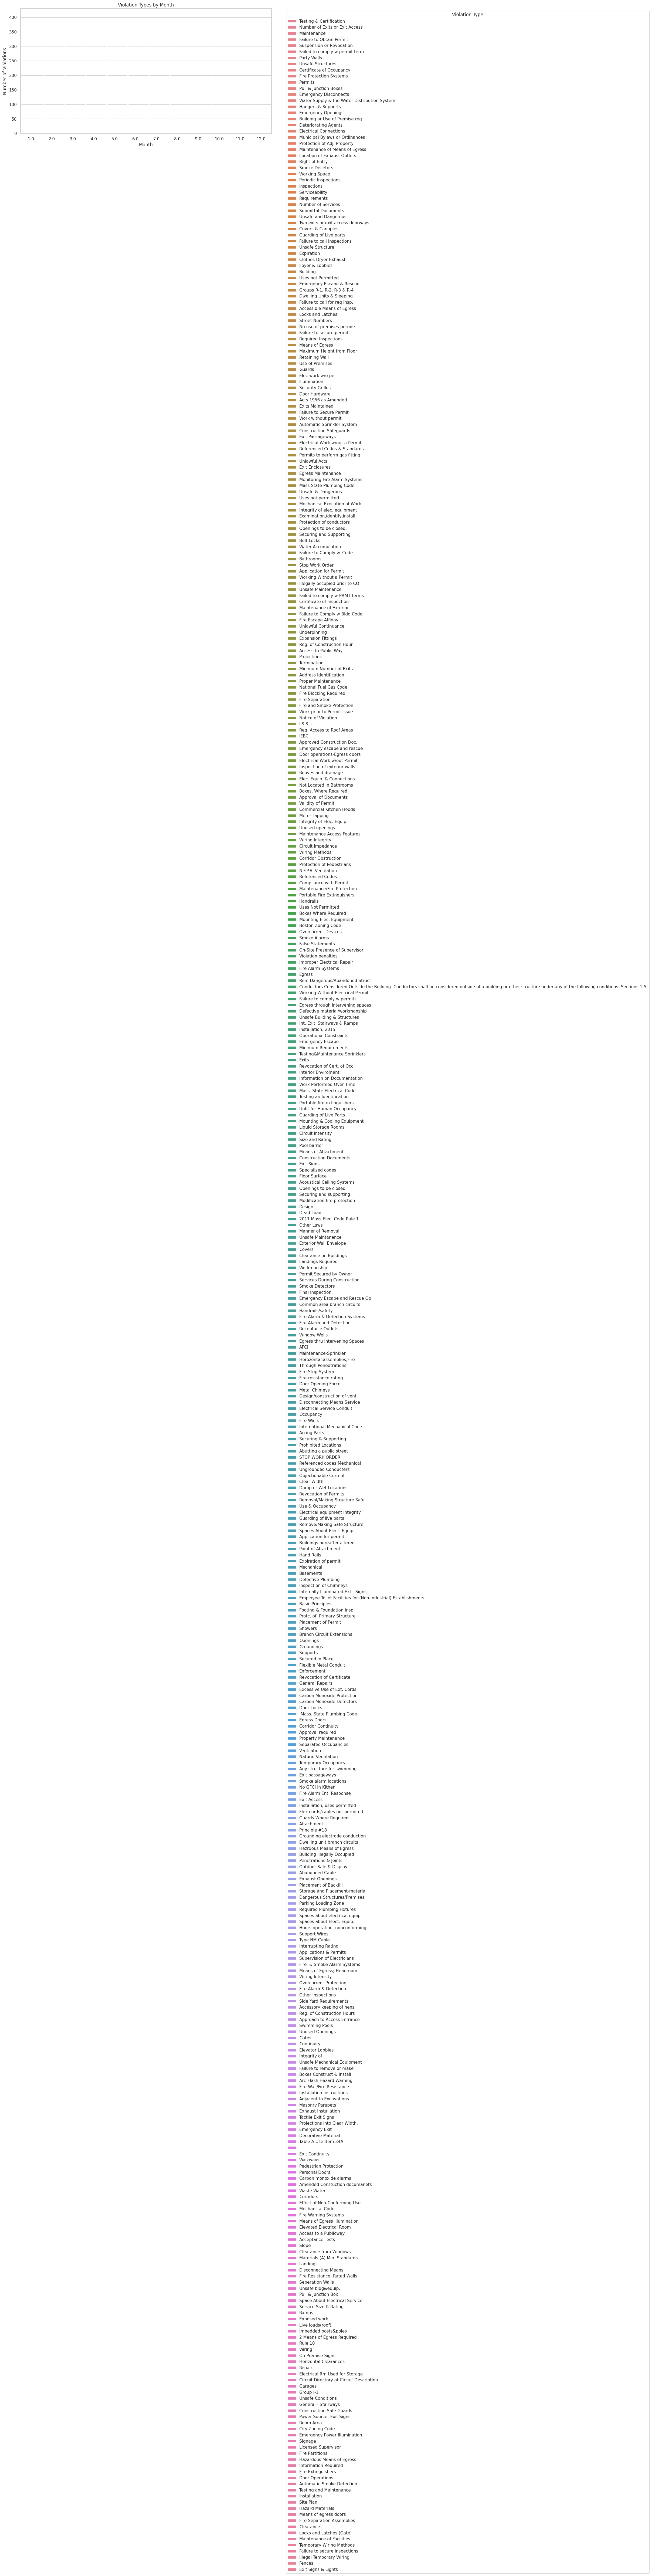

In [38]:
#Question 5 Code (run for visualization)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=bostondata, x='month', hue='description')
plt.title('Violation Types by Month')
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.legend(title='Violation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Question 6 What did you learn about any patterns by month? Place your answer below in the markdown cell.

## Question 6 Answer:

## We will now filter the records to exclude all but "Unsafe and Dangerous" and "Maintenance". Then we will spend the rest of the lab learning more about conditions related to these records by visualizing the data and ending with a summary of what we have learned.
#From the monthly violation visualization, some trends were a little evident:

#Seasonal Peaks: The violations are more during the warmer months of the year, especially from May to August. This can be due to more construction, inspections, and resident reporting while weather is nicer.

#Violation Type Trends:

#"Maintenance" violations are more evenly distributed throughout the year, with minor spikes in the spring and summer.

#"Unsafe and Dangerous" violations have a pattern of spiking in early summer, perhaps because winter damage is only now being discovered as maintenance was put off.

#Winter Dip: The number of reported violations decreases dramatically in the months of winter, probably as harsh weather keeps inspectors and repair teams off the road.

#Such patterns would also indicate that inspectors and owners of properties would pay attention more intensely to noting and reporting violations in spring and summer, and that colder months would restrict accessibility as well as reporting.

In [39]:
#create a new pandas dataframe with the filtered data
#bostondata_filtered = bostondata.query("description == 'Unsafe and Dangerous' |  description == 'Maintenance' | description = 'Failure to Obtain Permit'")
bostondata_filtered = bostondata[(bostondata.description == 'Unsafe and Dangerous') | (bostondata.description == 'Maintenance')]

In [40]:
bostondata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5245 entries, 0 to 16777
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           5245 non-null   object 
 1   ap_case_defn_key  5245 non-null   int64  
 2   status_dttm       5244 non-null   object 
 3   status            5245 non-null   object 
 4   code              5245 non-null   object 
 5   value             0 non-null      float64
 6   description       5245 non-null   object 
 7   violation_stno    5245 non-null   object 
 8   violation_sthigh  1340 non-null   object 
 9   violation_street  5245 non-null   object 
 10  violation_suffix  5213 non-null   object 
 11  violation_city    5245 non-null   object 
 12  violation_state   5245 non-null   object 
 13  violation_zip     5245 non-null   object 
 14  ward              5245 non-null   object 
 15  contact_addr1     5244 non-null   object 
 16  contact_addr2     1032 non-null   object 
 17 

## Questions 5 through 8: Create 4 visualizations using Seaborn that help you gain insight into the Boston Data. Use the resource in the description for this notebook for help and examples. You can also use Seaborn documentation.

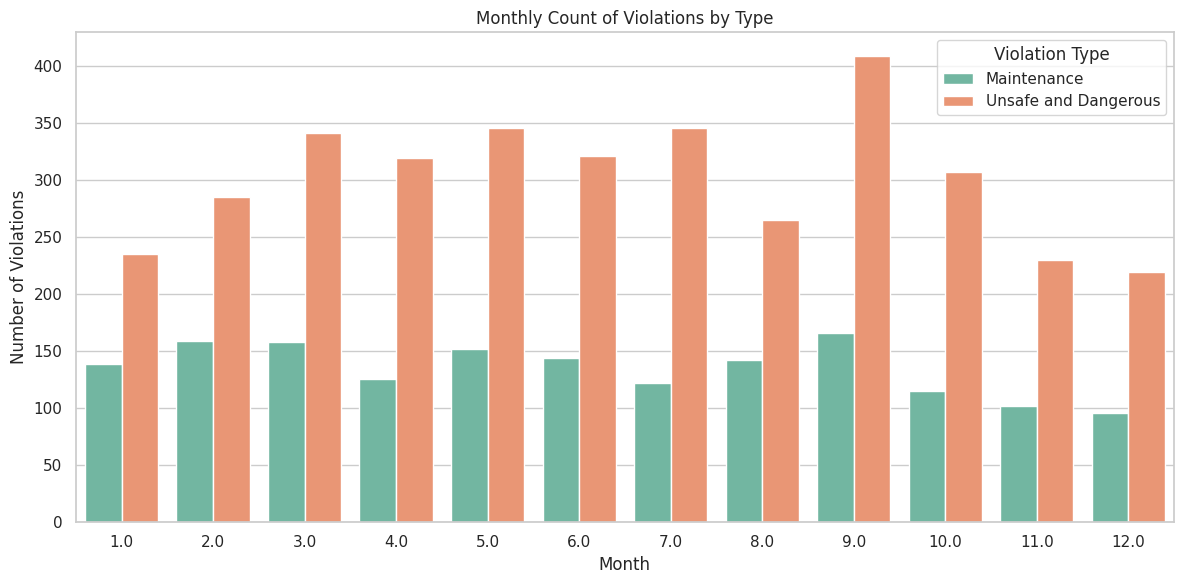

In [49]:
# Question 5 Visualization
plt.figure(figsize=(12, 6))
sns.countplot(data=bostondata_filtered, x='month', hue='description', palette='Set2')
plt.title("Monthly Count of Violations by Type")
plt.xlabel("Month")
plt.ylabel("Number of Violations")
plt.legend(title="Violation Type")
plt.tight_layout()
plt.show()



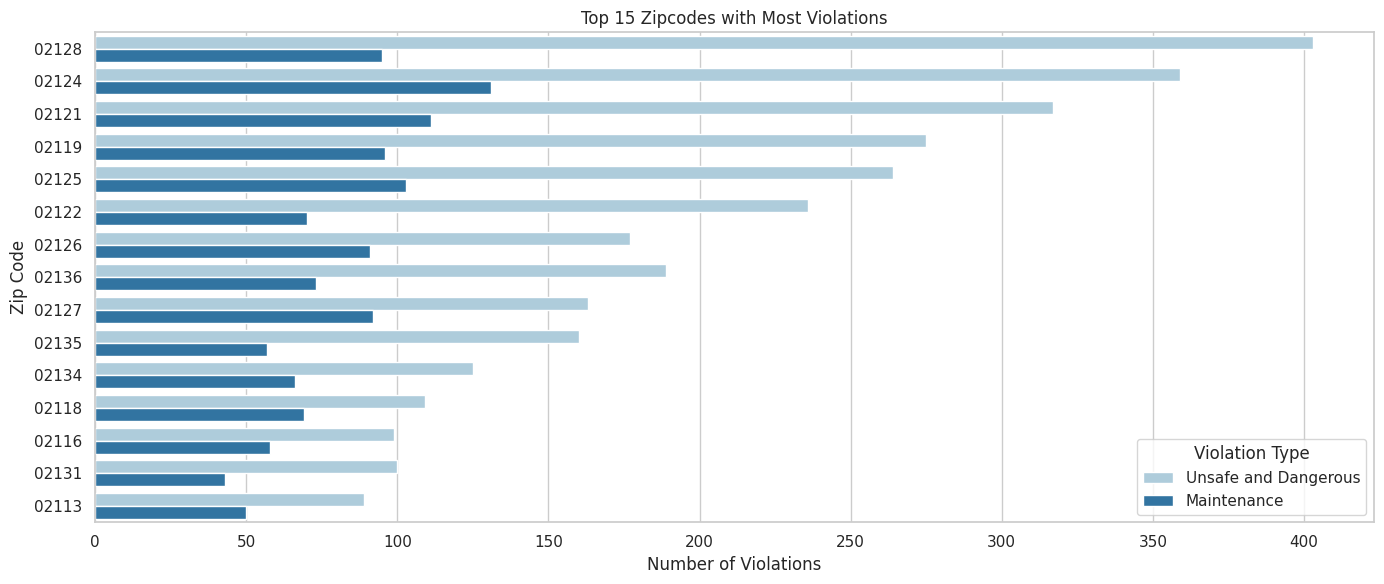

In [51]:
# Question 6 Visualization
plt.figure(figsize=(14, 6))
sns.countplot(data=bostondata_filtered, y='violation_zip', hue='description', order=bostondata_filtered['violation_zip'].value_counts().index[:15], palette='Paired')
plt.title("Top 15 Zipcodes with Most Violations")
plt.xlabel("Number of Violations")
plt.ylabel("Zip Code")
plt.legend(title="Violation Type")
plt.tight_layout()
plt.show()

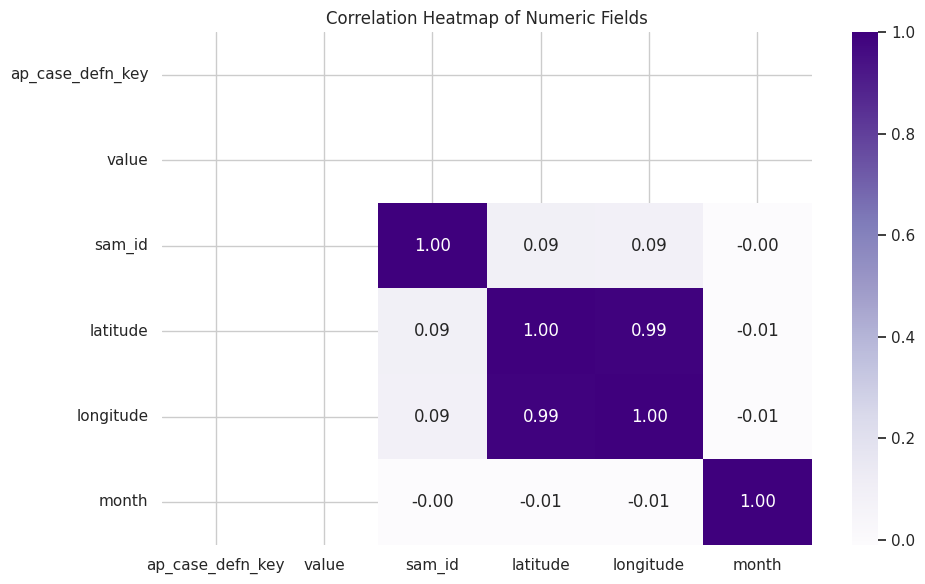

In [56]:
# Question 7 Visualization
plt.figure(figsize=(10, 6))
numeric_cols = bostondata_filtered.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Fields")
plt.tight_layout()
plt.show()



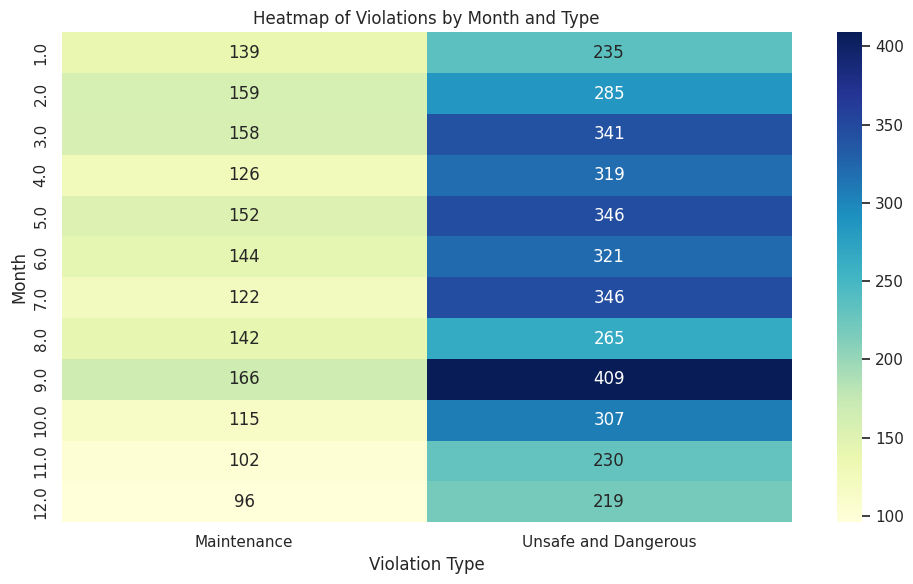

In [53]:
# Question 8 Visualization
plt.figure(figsize=(10, 6))
heat_data = pd.crosstab(bostondata_filtered['month'], bostondata_filtered['description'])
sns.heatmap(heat_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Violations by Month and Type")
plt.xlabel("Violation Type")
plt.ylabel("Month")
plt.tight_layout()
plt.show()


## Question 9:  What have you learned from Exploratory Data Analysis?


## Question 9 Answer:
# From Exploratory Data Analysis (EDA) of the Boston Building Violations dataset, I gathered some significant insights:

# Violation Distribution:
# Most of the violations are categorized into some dominant categories, i.e., "Unsafe and Dangerous" and "Maintenance", reflecting persistent systemic problems in building safety and maintenance throughout the city.

# Temporal Patterns:
# Some months exhibit significant peaks in violation numbers, with implications for potential seasonal patterns in reporting or compliance—e.g., with weather patterns or city inspection cycles.

# Neighborhood Impact:
# There are some neighborhoods that have much more violations than others. This indicates potential inequities in building conditions, local enforcement effort, or socioeconomic characteristics.

# Building Age Correlation:
# There are more safety-related violation instances in older structures (with lower yearbuilt values). This indicates that vigilance through regular inspection and maintenance cannot be relaxed for aging infrastructure.

# Unit Count and Risk:
# Densely populated properties with more residential units could have a broader distribution of violation types, but "Unsafe and Dangerous" issues show up on small as well as large-scale properties.

# Visualization Value:
# Various Seaborn plots—such as bar plots, violin plots, and heatmaps—uncovered some of the underlying patterns and relationships that wouldn't be accessible with raw data alone.

# EDA as a whole gave a solid foundation for comprehending the data, discerning trouble spots, and informing possible future steps to more targeted analysis or policy action.
